# Dummy variables or how to deal with categorical predictors

## Import the relevant libraries

In [5]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

We can override the default matplotlib styles with those of Seaborn:

In [6]:
sns.set()

## Load the data

In [7]:
raw_data = pd.read_csv('1.03. Dummies.csv')
raw_data.head()

,SAT,GPA,Attendance
0,1714,2.40,No
1,1664,2.52,No
2,1760,2.54,No
3,1685,2.74,No
4,1693,2.83,No


## Map the data

Map all 'No' entries with 0, and all 'Yes' entries with 1. Put that in a new variable called 'data'

In [8]:
data = raw_data.copy()
data['Attendance'] = data['Attendance'].map({'Yes': 1, 'No': 0})

data.head()

,SAT,GPA,Attendance
0,1714,2.40,0
1,1664,2.52,0
2,1760,2.54,0
3,1685,2.74,0
4,1693,2.83,0


In [9]:
data.describe()

,SAT,GPA,Attendance
count,84.000000,84.000000,84.000000
mean,1845.273810,3.330238,0.464286
std,104.530661,0.271617,0.501718
min,1634.000000,2.400000,0.000000
25%,1772.000000,3.190000,0.000000
50%,1846.000000,3.380000,0.000000
75%,1934.000000,3.502500,1.000000
max,2050.000000,3.810000,1.000000


The fact that the mean < 0.5 shows that there are more 0s than 1s

## Regression

In [10]:
y = data ['GPA']
x1 = data [['SAT','Attendance']]

Add a constant. Esentially, we are adding a new column (equal in lenght to x), which consists only of 1s

In [11]:
x = sm.add_constant(x1)

Fit the model, according to the OLS (ordinary least squares) method with a dependent variable y and an idependent x

In [12]:
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     52.70
Date:                Fri, 10 Apr 2020   Prob (F-statistic):           2.19e-15
Time:                        19:36:26   Log-Likelihood:                 25.798
No. Observations:                  84   AIC:                            -45.60
Df Residuals:                      81   BIC:                            -38.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6439      0.358      1.797      0.076      -0.069       1.357
SAT            0.0014      0.000      7.141      0.000       0.001       0.002
Attendance     0.2226      0.041      5.451      0.000       0.141       0.304
==============================================================================
Omnibus:                       19.560   Durbin-Watson:                   1.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.189
Skew:                          -1.028   Prob(JB):                     1.25e-06
Kurtosis:                       4.881   Cond. No.                     3.35e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Plot the regression line(s) on the scatter plot

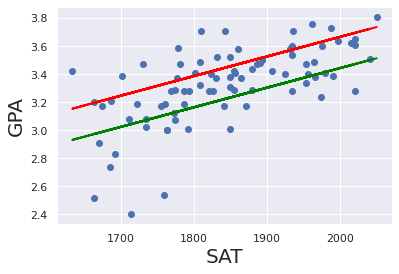

In [13]:
plt.scatter(data['SAT'],y)

yhat_no = 0.6439 + 0.0014*data['SAT']
yhat_yes = 0.8665 + 0.0014*data['SAT']

fig = plt.plot(data['SAT'],yhat_no, lw=2, c='green')
fig = plt.plot(data['SAT'],yhat_yes, lw=2, c='red')

plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)

plt.show()

## Plot the regression line(s) on the scatter plot and color the data points

Lets colour the points depending on attendance:

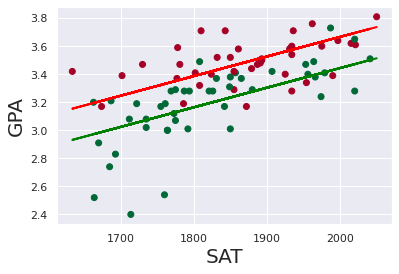

In [14]:
plt.scatter(data['SAT'],data['GPA'], c=data['Attendance'],cmap='RdYlGn_r')

fig = plt.plot(data['SAT'],yhat_no, lw=2, c='green')
fig = plt.plot(data['SAT'],yhat_yes, lw=2, c='red')

plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)

plt.show()

## Add the original regression line

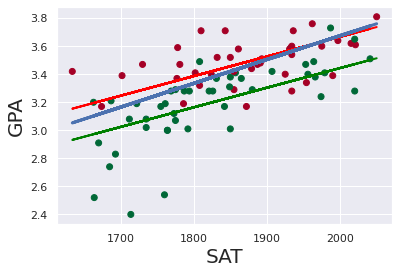

In [15]:
plt.scatter(data['SAT'],data['GPA'], c=data['Attendance'],cmap='RdYlGn_r')

yhat = 0.0017*data['SAT'] + 0.275

fig = plt.plot(data['SAT'],yhat_no, lw=2, c='green', label ='regression line1')
fig = plt.plot(data['SAT'],yhat_yes, lw=2, c='red', label ='regression line2')

fig = plt.plot(data['SAT'],yhat, lw=3, c='#4C72B0', label ='regression line')

plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)

plt.show()

# How to make predictions based on the regressions we create

In [16]:
x.head()

,const,SAT,Attendance
0,1.0,1714,0
1,1.0,1664,0
2,1.0,1760,0
3,1.0,1685,0
4,1.0,1693,0


In [17]:
new_data = pd.DataFrame({'const':1, 'SAT':[1700, 1670], 'Attendance':[0,1]})
new_data = new_data[['const', 'SAT', 'Attendance']]
new_data

,const,SAT,Attendance
0,1,1700,0
1,1,1670,1


In [18]:
new_data.rename(index={0:'mammad', 1:'taghi'})

,const,SAT,Attendance
mammad,1,1700,0
taghi,1,1670,1


In [20]:
predictions = results.predict(new_data)
predictions

0    3.023513
1    3.204163
dtype: float64

In [21]:
predictions_df = pd.DataFrame({'Predictions':predictions})
joined = new_data.join(predictions_df)
joined.rename(index={0:'mammad', 1:'taghi'})

,const,SAT,Attendance,Predictions
mammad,1,1700,0,3.023513
taghi,1,1670,1,3.204163


Taghi scored lower on the SAT, but he attended > 75% of lectures